In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime, timedelta

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_num_0 = pd.read_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_EDA_con_Python_CGG\Transformed_Data\Datos_Cat_Limpios_Bank", parse_dates=['Dt_Customer','date'])
df_num_0.sample(3)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
31979,43007,2,1,2014-11-22,31,ff35d40c-2620-46ad-be68-7d026dadeb7f,36.0,student,single,basic.9y,NaN,1.0,1.0,cellular,432.0,3.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no,2018-03-14,32.493,-72.916
11599,126386,2,0,2012-08-05,21,49c0bad1-0dc4-4fde-87df-03ecd671c8cd,56.0,blue-collar,married,basic.4y,0.0,0.0,0.0,telephone,11.0,5.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,NaN,5228.1,no,2015-12-24,34.511,-120.895
13877,87925,2,2,2012-04-08,11,faff86cb-a1cc-4609-8937-2e4b042fbcd1,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,cellular,479.0,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,2017-09-23,35.200,-85.413


In [4]:
df_num = df_num_0.copy()
df_num.sample(3)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
32927,50166,0,2,2014-11-21,29,3d69a095-9c07-425d-b6b3-db1580dbe43d,NaN,services,divorced,high.school,0.0,1.0,0.0,cellular,254.0,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,2016-03-31,40.184,-117.248
37314,114522,0,1,2014-09-24,24,28bfc7f7-9842-492d-b7ed-91636e91734a,NaN,technician,married,professional.course,0.0,0.0,0.0,cellular,48.0,2.0,999.0,0.0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no,2019-03-14,25.247,-107.143
30476,14554,0,1,2014-11-01,19,cef39f97-c0a7-4c37-8027-71cd48999e6c,34.0,services,married,professional.course,0.0,1.0,0.0,cellular,101.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,no,2018-01-16,33.265,-84.789


In [6]:
porcentaje_nulos = round(df_num.isnull().sum()/df_num.shape[0]*100,2)
porcentaje_nulos

Income                0.00
Kidhome               0.00
Teenhome              0.00
Dt_Customer           0.00
NumWebVisitsMonth     0.00
ID                    0.00
age                  12.25
job                   0.00
marital               0.00
education             0.00
default              21.20
housing               2.77
loan                  2.77
contact               0.00
duration              0.39
campaign              0.39
pdays                 0.39
previous              0.39
poutcome              0.00
emp.var.rate          0.39
cons.price.idx        1.48
cons.conf.idx         0.39
euribor3m            21.83
nr.employed           0.39
y                     0.00
date                  0.97
latitude              0.39
longitude             0.39
dtype: float64

In [7]:
df_num.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,43170.0,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
default,34019.0,0.000088,0.0,0.0,0.0,0.0,1.0,0.00939
housing,41974.0,0.535998,0.0,0.0,1.0,1.0,1.0,0.498708
loan,41974.0,0.15562,0.0,0.0,0.0,0.0,1.0,0.362499
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033


In [11]:
columnas_num = df_num.select_dtypes(include=np.number).columns.tolist()
columnas_num

['Income',
 'Kidhome',
 'Teenhome',
 'NumWebVisitsMonth',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'latitude',
 'longitude']

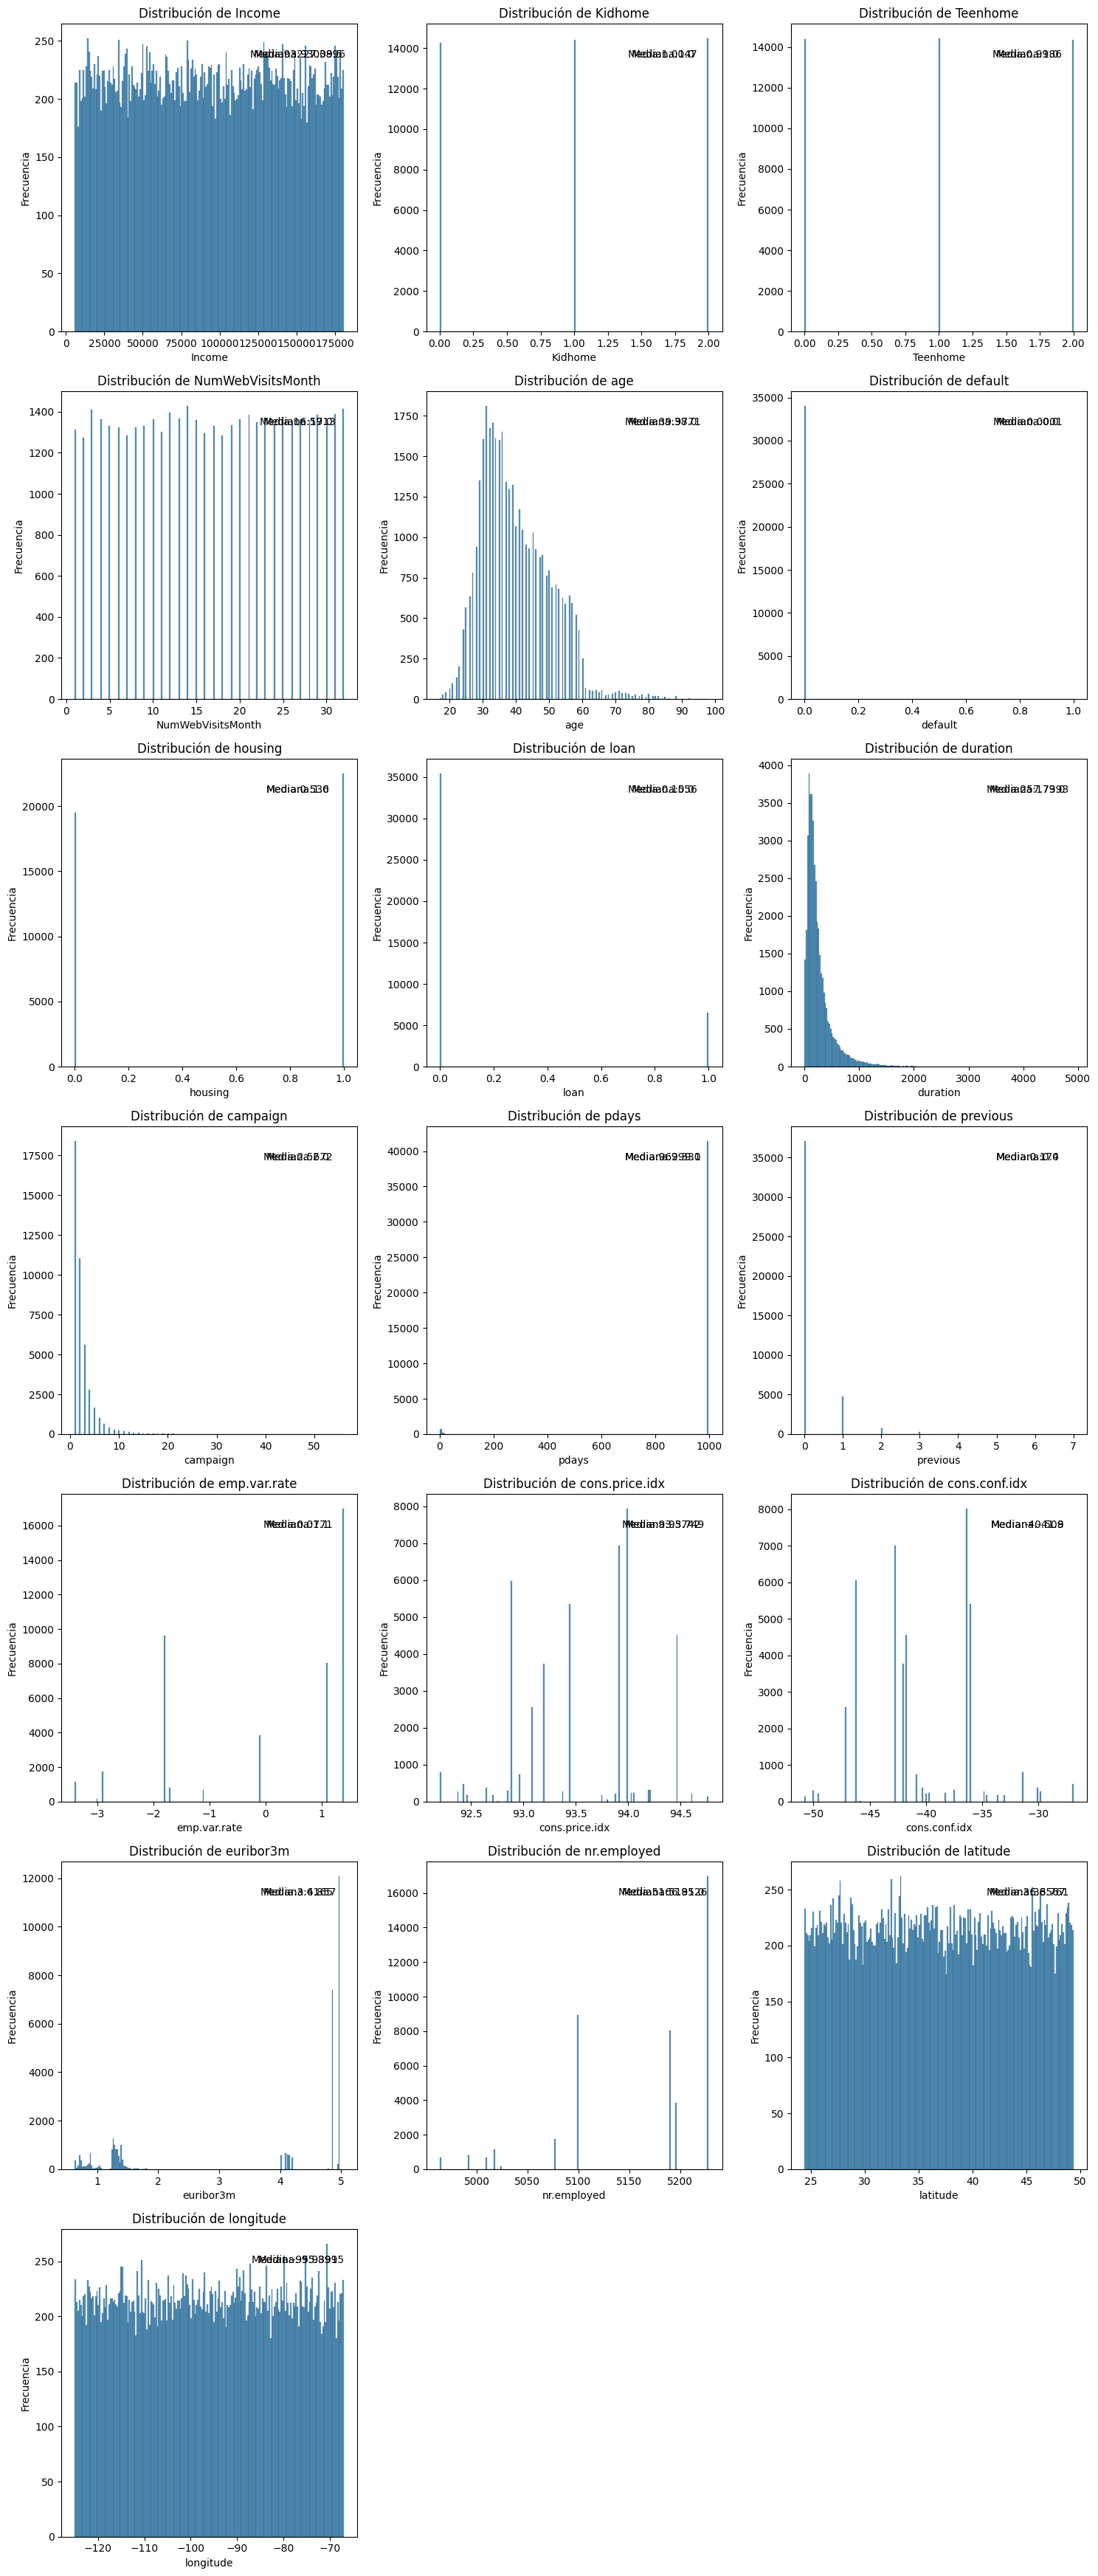

In [12]:
num_graph = len(columnas_num)

num_rows = (num_graph + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15,num_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_num):
    sns.histplot(data=df_num, x=col, ax = axes [i], bins=200)
    axes[i].text(0.8,0.9, f"Media:{round(df_num[col].mean(),4)}", horizontalalignment="center", verticalalignment="center", transform=axes[i].transAxes)
    axes[i].text(0.8,0.9, f"Mediana:{round(df_num[col].median(),4)}", horizontalalignment="center", verticalalignment="center", transform=axes[i].transAxes)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Frecuencia")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

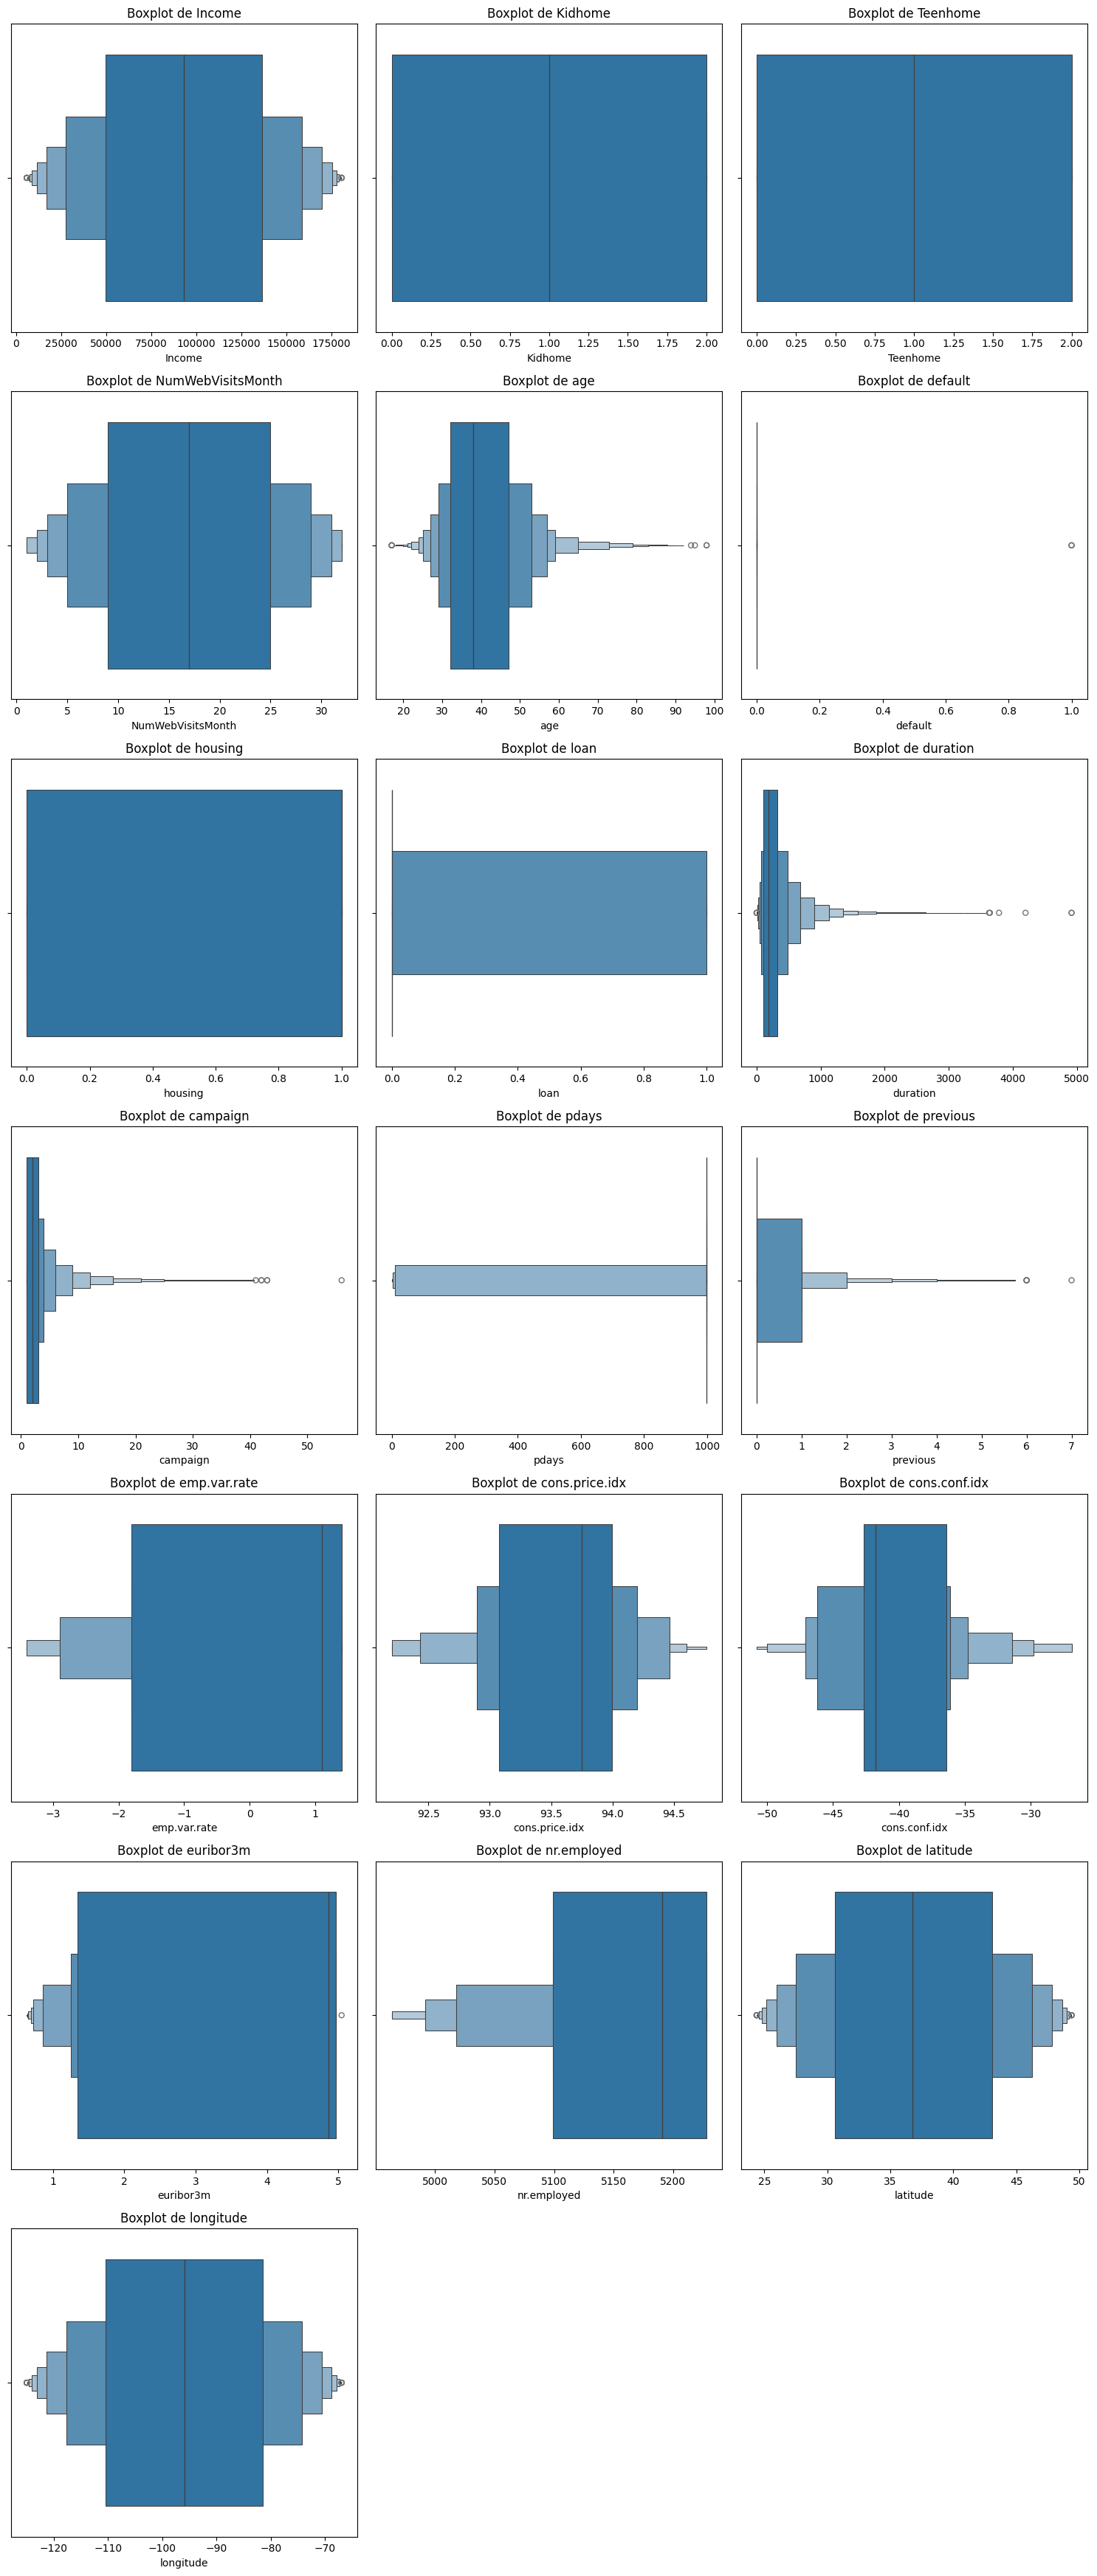

In [13]:
num_graph = len(columnas_num)

num_rows = (num_graph + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15,num_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_num):
    sns.boxenplot(data=df_num, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
df_num[columnas_num] = df_num[columnas_num].fillna("unknown")

In [15]:
porcentaje_nulos = round(df_num.isnull().sum()/df_num.shape[0]*100,2)
porcentaje_nulos

Income               0.00
Kidhome              0.00
Teenhome             0.00
Dt_Customer          0.00
NumWebVisitsMonth    0.00
ID                   0.00
age                  0.00
job                  0.00
marital              0.00
education            0.00
default              0.00
housing              0.00
loan                 0.00
contact              0.00
duration             0.00
campaign             0.00
pdays                0.00
previous             0.00
poutcome             0.00
emp.var.rate         0.00
cons.price.idx       0.00
cons.conf.idx        0.00
euribor3m            0.00
nr.employed          0.00
y                    0.00
date                 0.97
latitude             0.00
longitude            0.00
dtype: float64

In [16]:
df_num.to_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_EDA_con_Python_CGG\Transformed_Data\Datos_Cat_Num_Limpios_Bank", index=False)